In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
import sys
import os
from scipy.optimize import curve_fit
font = {'family' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

In [13]:
def clamp(a):
    try:
        c = np.copy(a)
        for i,e in enumerate(a):
            if e > 0:
                c[i] = a[i] 
            else:
                c[i] = 0
        return c
    except:
        if a > 0:
            return a
        else:
            return 0

def poli(x,a,b,c,d,e,f,g,h,i,j,k,l,m):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10 + l*x**11 + m*x**12

def fit_func(x,a,b,c):
    return a*(1-x/b)**c

In [14]:
for name in os.listdir("Daten"):
    plt.figure(figsize=(30,10))
    file = open("Daten/"+name)
    lines = file.readlines()
    xv,yv = [],[]
    for line in lines:
        vals = line[:-1].split("\t")
        xv.append(float(vals[0])) 
        yv.append(-float(vals[1]))

    popt,_ = curve_fit(fit_func,xv[:3288],yv[:3288],p0=[6.5,55,0.5])
    print(popt)
    plt.plot(xv,[fit_func(x,*popt) for x in xv],color="red",label="fit (1)",linewidth=3,linestyle="-.")
    #popt,_ = curve_fit(poli,xv,yv)
    #plt.plot(xv,[poli(x,*popt) for x in xv],color="orange",label="fit (2)",linewidth=3,linestyle="-.")
    #for x in xv:
    #    if poli(x,*popt) < 0:
    #        print(x)
    #        break
    #plt.plot(xv,[fit_func(x,1.5,56) for x in xv])
    #plt.ylim(0,6)

    plt.plot(xv,yv,marker=".",label="Messdaten")
    plt.xlabel("Temp [°C]")
    plt.ylabel("M-Feld [A/m]")
    plt.legend()
    file.close()
    plt.grid(True)
    file.close()
plt.savefig("..\..\Images\Teil3.png")

In [10]:
for x in xv:
    if x > 55:
        print(xv.index(x))

3288
3289
3290
3291
3292
3293
3294
3295
3296
3297
3298
3299
3300
3301
3302
3303
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
3363
3364
3365
3366
3367
3368
3369
3370
3371
3372
3373
3374
3375
3376
3377
3378
3379
3380
3381
3382
3383
3384
3385
3386
3387
3388
3389
3390
3391
3392
3393
3394
3395
3396
3397
3398
3399
3400
3401
3402
3403
3404
3405
3406
3407
3408
3409
3410
3411
3412
3413
3414
3415
3416
3417
3418
3419
3420
3421
3422
3423
3424
3425
3426
3427
3428
3429
3430
3431
3432
3433
3434
3435
3436
3437
3438
3439
3440
3441
3442
3443
3444
3445
3446
3447
3448
3449
3450
3451
3452
3453
3454
3455
3456
3457
3458
3459
3460
3461
3462
3463
3464
3465
3466
3467
3468
3469
3470
3471
3472
3473
3474
3475
3476
3477
3478
3479
3480
3481
3482
3483
3484
3485
3486
3487
3488
3489
3490
3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525


In [5]:
x_ys0 = [x for i,x in enumerate(xv) if yv[i] < 0]

In [6]:
min(x_ys0)

55.1403147

In [7]:
nx = []
dy = []
for i in range(len(xv)):
    try:
        dy.append((yv[i]-yv[i+1])/(xv[i]-xv[i+1]))
        nx.append((xv[i]+xv[i+1])/2)
    except:
        pass

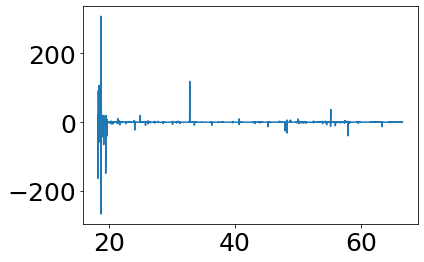

In [8]:
plt.plot(nx,dy)